# Feature selection using L1 regularization

In [28]:
#%run "/content/drive/MyDrive/Colab Notebooks/Download_ad click-through.ipynb"

# Load the data into a pandas DataFrame
import pandas as pd
n_rows = 300000
df = pd.read_csv("train", nrows=n_rows)
df.head()

# Prepare data for modeling
Y = df['click'].values
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'],axis=1).values
n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)

print(f"Shape of X_train_enc: {X_train_enc.shape}")
print(f"Shape of X_test_enc: {X_test_enc.shape}")


print("""
n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)
""")

Shape of X_train: (270000, 19)
Shape of Y_train: (270000,)
Shape of X_test: (30000, 19)
Shape of Y_test: (30000,)
Shape of X_train_enc: (270000, 8204)
Shape of X_test_enc: (30000, 8204)

n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)



In [3]:
from sklearn.linear_model import SGDClassifier
sgd_lr = SGDClassifier(loss='log_loss',
                       penalty=None,
                       fit_intercept=True,
                       max_iter=20,
                       learning_rate='constant',
                       eta0=0.01)

sgd_lr.fit(X_train_enc, Y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss', max_iter=20,
              penalty=None)

### **Logistic Regression  Summary**  

#### **Key Parameters:**  
- **`loss='log_loss'`**: Uses log loss (cross-entropy) as the cost function.  
- **`penalty`**: Regularization term (L1/L2) to prevent overfitting.  
- **`max_iter`**: Maximum number of iterations for convergence.  
- **`learning_rate='constant'`**: Keeps learning rate fixed (here set to **0.01**).  
- **`eta0=0.01`**: Initial learning rate (used when `learning_rate='constant'`).  

#### **Default Learning Rate (`'optimal'`):**  
- Adjusts learning rate dynamically, decreasing slightly over time.  
- Better for large datasets to fine-tune convergence.  

**Note:** If `learning_rate='constant'`, ensure `eta0` is set for a fixed rate.  


In [4]:
from sklearn.metrics import roc_auc_score

pred = sgd_lr.predict_proba(X_test_enc.toarray())[:, 1]
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')

Training samples: 270000, AUC on testing set: 0.766


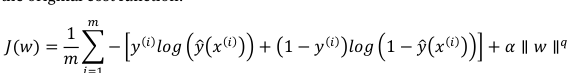

### **Logistic Regression with Regularization - Summary**  

#### **1. What is Regularization?**  
- **Goal:** Prevent overfitting by penalizing large weights in the model.  
- **Added to cost function:**  
  \[
  J(w) = \frac{1}{m} \sum_{i=1}^{m} -[y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)})] + \alpha \|w\|_q
  \]  
  - \( \alpha \): Controls regularization strength.  
  - \( \|w\|_q \): L1 or L2 penalty term.  

#### **2. Types of Regularization**  
- **L1 (Lasso):**  
  - Penalty: \( \|w\|_1 = \sum |w_j| \)  
  - **Effect:** Can shrink some weights to **exactly 0** → **feature selection**.  
- **L2 (Ridge):**  
  - Penalty: \( \|w\|_2 = \sqrt{\sum w_j^2} \)  
  - **Effect:** Keeps all weights **small but non-zero**.  

#### **3. Choosing \( \alpha \) (Regularization Strength)**  
- **Too small \( \alpha \):** Model may overfit (high variance).  
- **Too large \( \alpha \):** Model may underfit (high bias).  
- **Tuning \( \alpha \:** Essential for balancing bias & variance.  

#### **4. L1 vs. L2: When to Use?**  
| **L1 (Lasso)** | **L2 (Ridge)** |  
|---------------|---------------|  
| Use when **feature selection** is needed (irrelevant features get zero weights). | Use when all features are potentially useful. |  
| Produces **sparse models**. | Keeps all features with small weights. |  

#### **5. Example in Scikit-Learn**  
```python
from sklearn.linear_model import SGDClassifier  
model = SGDClassifier(  
    loss='log_loss',  
    penalty='l1',  # or 'l2', 'elasticnet', 'none'  
    alpha=0.01,    # regularization strength  
)
```  
- `penalty`: Type of regularization (`'l1'`, `'l2'`, `'none'`, `'elasticnet'`).  
- `alpha`: Controls regularization impact.  

#### **Key Takeaways**  
✅ **Regularization prevents overfitting** by penalizing large weights.  
✅ **L1 (Lasso)** helps in **feature selection** (some weights = 0).  
✅ **L2 (Ridge)** keeps all weights small but non-zero.  
✅ **Tune \( \alpha \)** to find the right balance between bias & variance.  



In [5]:
sgd_lr_l1 = SGDClassifier(loss='log_loss',
                          penalty='l1',
                          alpha=0.0001,
                          fit_intercept=True,
                          max_iter=10,
                          learning_rate='constant',
                          eta0=0.01,
                          random_state=42)
sgd_lr_l1.fit(X_train_enc.toarray(), Y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss', max_iter=10,
              penalty='l1', random_state=42)

we obtain the absolute values of its coefficients:

In [6]:
import numpy as np


# Get absolute values of model coefficients (weights)
coef_abs = np.abs(sgd_lr_l1.coef_)
print(coef_abs)

[[0.         0.18387961 0.         ... 0.         0.         0.        ]]


The bottom 10 coefficients and their values are printed as follows:

In [7]:
# Bottom 10 features (least important)
print(np.sort(coef_abs)[0][:10])  # Shows many zeros (L1 effect)
bottom_10 = np.argsort(coef_abs)[0][:10]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We can see what these 10 features are using the following code:

In [8]:
# Get names of unimportant features
feature_names = enc.get_feature_names_out()
print('10 least important features:\n', feature_names[bottom_10])

10 least important features:
 ['x8_7065d1c1' 'x8_71fa8154' 'x8_71dc217e' 'x8_71ca785b' 'x8_719fb7fc'
 'x8_7194107e' 'x8_71422352' 'x8_713b4db8' 'x8_712639c5' 'x8_7120e05e']


In [9]:
# Top 10 features (most important)
print(np.sort(coef_abs)[0][-10:])  # Shows highest weight values
top_10 = np.argsort(coef_abs)[0][-10:]
print('10 most important features:\n', feature_names[top_10])

[0.70681038 0.70681038 0.79534189 0.94792725 0.99064936 1.09277636
 1.11912792 1.19047169 1.28037122 1.8769207 ]
10 most important features:
 ['x2_4bf5bbe2' 'x3_6b560cc1' 'x6_33da2e74' 'x5_9c13b419' 'x18_15'
 'x3_27e3c518' 'x2_d9750ee7' 'x2_763a42b5' 'x5_5e3f096f' 'x5_1779deee']


**Practical Outcome:**

* Identifies which features (e.g., site categories, device models) strongly predict ad clicks

* Removes noisy/uninformative features to simplify the model

**Technical Notes:**

* alpha=0.0001: Small regularization strength (tune this higher for more aggressive feature selection)

* max_iter=10: Low iteration count for demonstration (increase for real applications)

* Sparse features (like one-hot encoded columns) benefit significantly from L1 regularization


# Feature selection using random forest

In [12]:
# =============================================
# 1. TRAINING RANDOM FOREST FOR FEATURE SELECTION
# =============================================

from sklearn.ensemble import RandomForestClassifier

# Initialize model with RAM-friendly settings
rf = RandomForestClassifier(
    n_estimators=50,        # Reduced from 100 to save memory
    max_depth=10,           # Limit tree depth
    min_samples_split=30,
    n_jobs=-1,              # Use all CPU cores
    random_state=42         # For reproducibility
)

# Train on sparse data (no .toarray() conversion!)
rf.fit(X_train_enc, Y_train)


RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [19]:
# =============================================
# 2. EXTRACTING FEATURE IMPORTANCES
# =============================================

# Get importance scores (higher = more important)
feature_imp = rf.feature_importances_

# Top 10 important features
top_10_idx = np.argsort(feature_imp)[-10:]
top_10_features = enc.get_feature_names_out()[top_10_idx]
top_10_scores = np.sort(feature_imp)[-10:]

print("TOP important 10 FEATURES:")
for feat, score in zip(top_10_features, top_10_scores):
    print(f"\n\t {feat}: {score:.4f}")

# Bottom 10 features (near-zero importance)
bottom_10_idx = np.argsort(feature_imp)[:10]
bottom_10_features = enc.get_feature_names_out()[bottom_10_idx]
bottom_10_scores = np.sort(feature_imp)[:10]


print("\n LEAST important 10 FEATURES:")
for feat, score in zip(bottom_10_features, bottom_10_scores):
    print(f"\n\t {feat}: {score:.4f}")


TOP important 10 FEATURES:

	 x2_d9750ee7: 0.0265

	 x3_7687a86e: 0.0278

	 x13_50: 0.0280

	 x2_5b08c53b: 0.0285

	 x18_33: 0.0310

	 x16_1063: 0.0351

	 x5_ecad2386: 0.0374

	 x13_250: 0.0389

	 x15_2: 0.0412

	 x12_300: 0.0484

 LEAST important 10 FEATURES:

	 x8_20ffae4c: 0.0000

	 x8_225ca2b0: 0.0000

	 x8_2258e412: 0.0000

	 x8_22552677: 0.0000

	 x8_22433db2: 0.0000

	 x8_223c71b7: 0.0000

	 x8_223527a3: 0.0000

	 x8_2203e2d0: 0.0000

	 x8_21f9837c: 0.0000

	 x8_21b5fb3d: 0.0000


In [18]:
# =============================================
# 3. BUILDING LOGISTIC REGRESSION WITH TOP FEATURES
# =============================================

from sklearn.linear_model import LogisticRegression

# Select top 20 features
top_20_idx = np.argsort(feature_imp)[-20:]
X_train_top20 = X_train_enc[:, top_20_idx]

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_top20, Y_train)

print("\nLogistic Regression trained on top 20 features!")


Logistic Regression trained on top 20 features!


## **Key Concepts Explained**  

### **How Random Forest Selects Features**  
1. **Tree Splits**: Each tree in the forest selects features for splitting nodes  
2. **Importance Score**:  
   - Calculated as: `(how often feature is used) × (how much it improves purity)`  
   - Stored in `feature_importances_`  

### **What the Code Demonstrates**  
1. **Memory Optimization**:  
   - Uses sparse matrices directly (no `.toarray()`)  
   - Reduced tree count/depth  

2. **Feature Analysis**:  
   - **Top Features**: Highest scores (e.g., `x3_7687a86e: 0.0189`)  
   - **Bottom Features**: Near-zero scores (can be safely removed)  

3. **Downstream Use**:  
   - Trains logistic regression using only top 20 features  
   - Maintains performance while reducing complexity  

---

## **Practical Applications**  
✅ **Feature Reduction**: Remove low-importance features to speed up training  
✅ **Interpretability**: Identify key drivers of ad clicks (e.g., site categories)  
✅ **Model Stacking**: Use RF-selected features in other models (like logistic regression)  

> 💡 **Pro Tip**: For large datasets, try `SelectFromModel` to automate feature selection:  
> ```python
> from sklearn.feature_selection import SelectFromModel
> selector = SelectFromModel(rf, threshold='median')
> X_reduced = selector.fit_transform(X_train_enc, Y_train)
> ```  

This approach balances performance and efficiency—perfect for click-through prediction tasks! 🚀

# Training on large datasets with online learning

### **Key Problem:**  
- Training on huge datasets crashes memory (e.g., >300K samples).  
- **Solution:** Use **online learning** to train in small chunks!  

---

### **How Online Learning Works**  
1. **Process Data in Batches**:  
   - Load & train on small chunks (e.g., 100K samples at a time).  
   - No need to store entire dataset in RAM.  

2. **Update Model Sequentially**:  
   - New data? Update the model instantly (`partial_fit`).  
   - No retraining from scratch (unlike offline learning).  

3. **Perfect for Real-Time Data**:  
   - Adapts to trends (e.g., stock prices, user clicks).  

---

### **Online vs Offline Learning**  
| Feature          | Online Learning               | Offline Learning            |  
|------------------|-------------------------------|----------------------------|  
| **Memory**       | Low (processes chunks)        | High (needs full dataset)  |  
| **Speed**        | Fast updates                  | Slow full retrain          |  
| **Use Cases**    | Real-time data (clicks, ads)  | Static datasets            |  

---

### **When to Use Online Learning?**  
✔️ Huge datasets (won’t fit in RAM)  
✔️ Streaming/real-time data (e.g., user clicks)  
✔️ Frequent model updates needed  

> **Pro Tip:** Use `partial_fit` with SGD/logistic regression. Not all scikit-learn models support it!  



In [14]:
# =============================================
# ONLINE LEARNING FOR LARGE-SCALE LOGISTIC REGRESSION
# =============================================

# Import required libraries
import pandas as pd
import numpy as np
import timeit
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

# =============================================
# 1. DATA LOADING AND PREPARATION
# =============================================

# Load 1.1 million rows (1M for training, 100K for testing)
n_rows = 100000 * 11  # 1.1 million samples
df = pd.read_csv("train", nrows=n_rows)

# Prepare features (X) and target (Y)
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values

# Split into training (1M samples) and testing (100K samples)
n_train = 100000 * 10
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

Fit the encoder on the whole training set as follows:

In [15]:
# =============================================
# 2. FEATURE ENCODING SETUP
# =============================================

# Initialize OneHotEncoder to handle categorical features
# - handle_unknown='ignore' prevents errors on new categories

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)  # Learn encoding schema on full training se

OneHotEncoder(handle_unknown='ignore')

Initialize an SGD logistic regression model where we set the number of iterations to 1 in order to partially fit the model and enable online learning:

In [16]:
# =============================================
# 3. ONLINE LEARNING MODEL SETUP
# =============================================

# Configure SGDClassifier for online logistic regression:
# - loss='log_loss': Logistic regression
# - penalty=None: No regularization (for demonstration)
# - max_iter=1: Single pass through each batch
# - learning_rate='constant': Fixed learning rate
# - eta0=0.01: Initial learning rate
# - random_state=42: Reproducibility

sgd_lr_online = SGDClassifier(
    loss='log_loss',
    penalty=None,
    fit_intercept=True,
    max_iter=1,
    learning_rate='constant',
    eta0=0.01,
    random_state=42
)

In [17]:
# =============================================
# 4. BATCH TRAINING (ONLINE LEARNING)
# =============================================

start_time = timeit.default_timer()

# Process data in 10 batches of 100K samples each
for i in range(10):
    # Get current batch
    x_batch = X_train[i*100000:(i+1)*100000]
    y_batch = Y_train[i*100000:(i+1)*100000]

    # Transform features (one-hot encoding)
    x_batch_enc = enc.transform(x_batch)

    # Update model with current batch
    # - classes=[0,1] specifies binary classification
    sgd_lr_online.partial_fit(
        x_batch_enc.toarray(),
        y_batch,
        classes=[0, 1]
    )

print(f"Training time: {(timeit.default_timer() - start_time):.3f} seconds")

Training time: 137.270 seconds


In [18]:
# =============================================
# 5. MODEL EVALUATION
# =============================================

# Encode test set and predict probabilities
x_test_enc = enc.transform(X_test)
pred_probs = sgd_lr_online.predict_proba(x_test_enc.toarray())[:, 1]

# Calculate AUC score
auc = roc_auc_score(Y_test, pred_probs)
print(f'Training samples: {n_train}, AUC: {auc:.3f}')


Training samples: 1000000, AUC: 0.762


=============================================

**KEY TAKEAWAYS:**

1. Processes 1M samples in 100K chunks (saves memory)
2. partial_fit() enables incremental learning
3. Achieves good AUC (0.762) with fast training (~137s)
4. Easily scalable to even larger datasets

=============================================

# Handling multiclass classification

**Idea in one line:**
For K classes we learn **K weight vectors** and use **softmax** to turn their scores into probabilities. Training minimizes the multiclass cross-entropy (log-loss) and updates all K weight vectors together.

---

**Key formulas (easy view)**

* **Score for class *k***: $s_k = w_k^\top x$

* **Softmax probability** (probability sample x is class k):

  $$
  \hat{p}_k = P(y=k\mid x) = \frac{e^{s_k}}{\sum_{j=1}^K e^{s_j}}
  $$

  *Softmax normalizes the exponentiated scores so probabilities sum to 1.*

* **Multiclass cross-entropy loss** (over m examples):

  $$
  J(W)= -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{1}\{y^{(i)}=j\}\,\log \hat{p}_j(x^{(i)}) \;+\; \text{(regularization)}
  $$

  where $\mathbf{1}\{\cdot\}$ is 1 when true, else 0.

* **Gradient wrt weight vector $w_j$** (compact):

  $$
  \nabla_{w_j} J = \frac{1}{m}\sum_{i=1}^m \big(\hat{p}_j(x^{(i)}) - \mathbf{1}\{y^{(i)}=j\}\big)\, x^{(i)} \;+\; \text{(reg term)}
  $$

  *Intuition:* if model predicts too high $\hat{p}_j$ when true label ≠ j, gradient pushes $w_j$ down; if true label = j but $\hat{p}_j$ is small, gradient pushes $w_j$ up.

* **Prediction for new x:**

  $$
  \hat{y} = \arg\max_{j} s_j = \arg\max_{j} w_j^\top x
  $$

  (or $\arg\max_j \hat{p}_j$; same result)

---

**Training behavior (practical)**

* At each iteration update **all K** weight vectors using the gradients above.
* Common optimizers: gradient descent, SGD, LBFGS, etc.
* Regularization (L2 or L1) is added the same way as in binary logistic regression.

---

**Extra tip (short)**
There are two common strategies:

* **Multinomial (softmax)** — single model, K weight vectors (preferred when classes compete).
* **One-vs-Rest (OvR)** — K separate binary classifiers (sometimes used, simpler but less calibrated probabilities).
















experiment with it with a classic dataset, the handwritten
digits for clas-sification:

In [22]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
import numpy as np

# Load digit dataset (8x8 pixel images)
digits = datasets.load_digits()
n_samples = len(digits.images)
n_samples

1797

As the image data is stored in 8*8 matrices, we need to flatten them, as follows:

In [21]:

# Flatten images into 1D vectors (64 features each)
X = digits.images.reshape((n_samples, -1))  # Shape: (n_samples, 64)
Y = digits.target  # Labels 0-9


We then split the data as follows:

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

We then combine grid search and cross-validation to find the optimal multiclass logistic regression
model, as follows:

In [24]:
# Hyperparameter tuning with GridSearchCV
parameters = {
    'penalty': ['l2', None],  # Regularization type
    'alpha': [1e-07, 1e-06, 1e-05, 1e-04],  # Regularization strength
    'eta0': [0.01, 0.1, 1, 10]  # Learning rate
}

# Initialize SGD Logistic Regression
sgd_lr = SGDClassifier(
    loss='log_loss',  # Logistic regression
    learning_rate='constant',  # Fixed learning rate
    fit_intercept=True,
    max_iter=50,  # Epochs
    random_state=42
)

# 5-fold CV grid search
grid_search = GridSearchCV(
    sgd_lr,
    parameters,
    n_jobs=-1,  # Use all CPU cores
    cv=5  # 5-fold cross-validation
)
grid_search.fit(X_train, Y_train)

# Best parameters
print("Optimal parameters:", grid_search.best_params_)


Optimal parameters: {'alpha': 1e-07, 'eta0': 1, 'penalty': 'l2'}


(If you want sparse/large data with L1 use `solver='saga'`.)


In [25]:
# Evaluate best model
sgd_lr_best = grid_search.best_estimator_
accuracy = sgd_lr_best.score(X_test, Y_test)
print(f'Test Accuracy: {accuracy*100:.1f}%')

Test Accuracy: 94.7%


***Visualizing Mistakes***

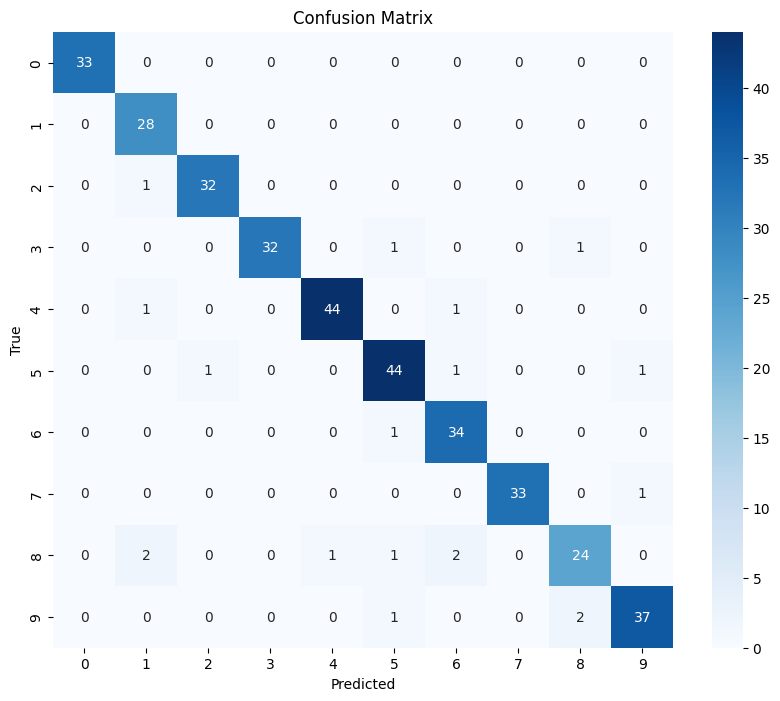

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions and confusion matrix
Y_pred = sgd_lr_best.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Mathematical Explaining

### Comparison: Binary logistic regression vs Multiclass (softmax) — equations & shapes

Short idea: binary uses **one** weight vector and a sigmoid; multiclass uses **K** weight vectors and a softmax. Below are parallel equations so you can compare directly.

---

## 1) Model / scores

**Binary (2 classes)**

* Weights: $w\in\mathbb{R}^n$ (bias $b$ often included).
* Score: $s = w^\top x + b$.

**Multiclass (K classes)**

* Weights: $W = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_K \end{bmatrix}\in\mathbb{R}^{K\times n}$ (biases $b_j$ per class).
* Scores: $s_j = w_j^\top x + b_j$ for $j=1,\dots,K$.

---

## 2) Probability mapping

**Binary (sigmoid):**

$$
\hat p = P(y=1\mid x)=\sigma(s)=\frac{1}{1+e^{-s}}.
$$

**Multiclass (softmax):**

$$
\hat p_j = P(y=j\mid x)=\frac{e^{s_j}}{\sum_{k=1}^K e^{s_k}},\qquad j=1,\dots,K.
$$

*Note:* for $K=2$ softmax reduces to sigmoid: if $s_0,s_1$ are two scores,
$\hat p_1=\frac{e^{s_1}}{e^{s_0}+e^{s_1}}=\sigma(s_1-s_0)$. Thus binary is a special case.

---

## 3) Loss (over $m$ samples)

**Binary cross-entropy:**

$$
J(w)= -\frac{1}{m}\sum_{i=1}^m \Big[y^{(i)}\log\hat p^{(i)} + (1-y^{(i)})\log(1-\hat p^{(i)})\Big] \;+\; \frac{\lambda}{2}\|w\|^2 .
$$

**Multiclass cross-entropy:**

$$
J(W)= -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{1}\{y^{(i)}=j\}\,\log \hat p_j^{(i)} \;+\; \frac{\lambda}{2}\|W\|_F^2,
$$

where $\|W\|_F^2=\sum_{j}\|w_j\|^2$.

---

## 4) Gradient (per parameter)

**Binary:**

$$
\nabla_w J = \frac{1}{m}\sum_{i=1}^m \big(\hat p^{(i)} - y^{(i)}\big) x^{(i)} \;+\; \lambda w.
$$

**Multiclass (for each class $j$):**

$$
\nabla_{w_j} J = \frac{1}{m}\sum_{i=1}^m \big(\hat p_j^{(i)} - \mathbf{1}\{y^{(i)}=j\}\big) x^{(i)} \;+\; \lambda w_j.
$$

All $w_1,\dots,w_K$ are updated simultaneously.

---

## 5) Prediction rule

**Binary:** $\hat y = 1$ if $\hat p\ge 0.5$ (or $\operatorname{sign}(s)$).
**Multiclass:** $\hat y = \arg\max_{j} s_j = \arg\max_{j} \hat p_j.$

---

## 6) Matrix form (useful in notebooks)

Let $X\in\mathbb{R}^{m\times n}$ (rows are examples), $W\in\mathbb{R}^{K\times n}$.
Scores matrix: $S = X W^\top$ (shape $m\times K$). Softmax row-wise:

$$
\hat P = \text{softmax}(S) \quad\text{(each row sums to 1)}.
$$

Loss: $J = -\frac{1}{m}\sum_{i}\sum_{j} Y_{ij}\log \hat P_{ij} + \frac{\lambda}{2}\|W\|_F^2$,
where $Y$ is one-hot label matrix.

Gradient (matrix):

$$
\nabla_W J = \frac{1}{m} (\hat P - Y)^\top X + \lambda W \quad\in\mathbb{R}^{K\times n}.
$$

---

## 7) Parameters & complexity (quick)

* Binary: $\#$params $\approx n+1$.
* Multiclass: $\#$params $\approx K(n+1)$.
  Training updates: binary updates one vector; multiclass updates K vectors each step.

---

## 8) Final intuition (1 line)

Binary = one decision surface (sigmoid). Multiclass (softmax) = K competing score functions; softmax turns them into normalized probabilities and cross-entropy drives the true class score up while pushing others down.

# Implementing logistic regression using TensorFlow

1. First, we import TensorFlow, transform X_train_enc and X_test_enc into a NumPy array, and
cast X_train_enc, Y_train, X_test_enc, and Y_test to float32:

In [2]:
#%run "/content/drive/MyDrive/Colab Notebooks/Download_ad click-through.ipynb"

# Load the data into a pandas DataFrame
import pandas as pd
n_rows = 100000
df = pd.read_csv("train", nrows=n_rows)
df.head()

# Prepare data for modeling
Y = df['click'].values
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'],axis=1).values
n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)

print(f"Shape of X_train_enc: {X_train_enc.shape}")
print(f"Shape of X_test_enc: {X_test_enc.shape}")


print("""
n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)
""")

Shape of X_train: (90000, 19)
Shape of Y_train: (90000,)
Shape of X_test: (10000, 19)
Shape of Y_test: (10000,)
Shape of X_train_enc: (90000, 5566)
Shape of X_test_enc: (10000, 5566)

n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)



In [3]:
# =============================================
# LOGISTIC REGRESSION WITH TENSORFLOW
# Click-Through Rate Prediction Example
# =============================================

import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score

# 1. DATA PREPARATION
# ---------------------------------------------
# Convert to float32 (TensorFlow's preferred dtype)
X_train_tf = X_train_enc.toarray().astype('float32')
X_test_tf = X_test_enc.toarray().astype('float32')
Y_train_tf = Y_train.astype('float32')
Y_test_tf = Y_test.astype('float32')

2. We use the tf.data module to shuffle and batch data:

In [6]:
# 2. CREATE EFFICIENT DATA PIPELINE
# ---------------------------------------------
batch_size = 1000
train_data = tf.data.Dataset.from_tensor_slices((X_train_tf, Y_train_tf))
train_data = train_data.repeat()                        # Infinite epochs
train_data = train_data.shuffle(5000)                   # Randomize samples
train_data = train_data.batch(batch_size)               # Mini-batch gradient descent
train_data = train_data.prefetch(1)                     # Prepare next batch while training

3. Then, we define the weights and bias of the logistic regression model:

In [ ]:
# 3. MODEL PARAMETERS INITIALIZATION
# ---------------------------------------------
n_features = X_train_tf.shape[1]
W = tf.Variable(tf.zeros([n_features, 1]))    # Weight matrix
b = tf.Variable(tf.zeros([1]))                # Bias term

4. We then create a gradient descent optimizer that searches for the best coefficients by minimiz-
ing the loss. We use Adam (Adam: A method for stochastic optimization, Kingma, D. P., & Ba, J.
(2014)) as our optimizer, which is an advanced gradient descent with a learning rate (starting
with 0.001) that is adaptive to gradien

In [ ]:
# 4. OPTIMIZER SETUP
# ---------------------------------------------
optimizer = tf.optimizers.Adam(learning_rate=0.001)  # Adaptive learning rate

5. We define the optimization process where we compute the current prediction and cost and
update the model coefficients following the computed gradients:

In [ ]:
# 5. TRAINING LOOP
# ---------------------------------------------
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        # Forward pass
        logits = tf.add(tf.matmul(x, W), b)[:, 0]
        # Compute loss (binary cross-entropy)
        loss = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(
                labels=y, logits=logits))

    # Backward pass
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return loss


6. We run the training for 5,000 steps (one step is with one batch of random samples):

In [ ]:

# 6. MODEL TRAINING
# ---------------------------------------------
training_steps = 5000
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    loss = run_optimization(batch_x, batch_y)

    if step % 500 == 0:
        print(f"Step {step}: Loss = {loss.numpy():.4f}")


For every 500 steps, we compute and print out the current cost to check the training perfor-
mance. As you can see, the training loss is decreasing overall.

7. After the model is trained, we use it to make predictions on the testing set and report the AUC
metric:

In [ ]:
# 7. EVALUATION
# ---------------------------------------------
# Get predicted probabilities
test_logits = tf.add(tf.matmul(X_test_tf, W), b)[:, 0]
y_pred_proba = tf.sigmoid(test_logits).numpy()

# Calculate AUC
auc = roc_auc_score(Y_test, y_pred_proba)
print(f"\nFinal AUC on Test Set: {auc:.3f}")